# Exemplo - Mecânica Newtoniana
## Professor Paulo Victor

In [1]:
import sympy as sy
import sympy.physics.mechanics as me

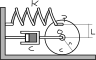

In [2]:
from IPython.core.display import SVG
SVG(filename='Din_Corpo_2.svg')

In [3]:
N = me.ReferenceFrame('N')
D = me.ReferenceFrame('D')

In [4]:
theta = me.dynamicsymbols('theta')

In [5]:
r,L,h,k,c,m,g = sy.symbols('r L h k c m g')

In [6]:
D.orient(N,'Axis',[theta,N.z])

In [7]:
C = me.Point('C')
C.set_vel(N,0)

In [8]:
O = me.Point('O')
p_O_C = r*D.y
O.set_pos(C,p_O_C)
O.set_vel(N,p_O_C.dt(N))
O.vel(N).express(N)

- r*cos(theta)*theta'*N.x - r*sin(theta)*theta'*N.y

In [9]:
O.acc(N).express(N)

(r*sin(theta)*theta'**2 - r*cos(theta)*theta'')*N.x + (-r*sin(theta)*theta'' - r*cos(theta)*theta'**2)*N.y

In [10]:
P =  me.Point('P')
p_P_C = (r + L)*D.y
P.set_pos(C,p_P_C)
P.set_vel(N,p_P_C.dt(N))
P.vel(N)

- (L + r)*theta'*D.x

In [11]:
P.acc(N)

(-L - r)*theta''*D.x - (L + r)*theta'**2*D.y

In [12]:
I = me.inertia(D,1/4*m*r**2 + 1/12*m*h**2 + m*r**2,1/4*m*r**2 + 1/12*m*h**2,1/2*m*r**2 + m*r**2)

In [13]:
Disco = me.RigidBody('Disco',O,D,m,(I,C))

In [14]:
G = Disco.linear_momentum(N)
G

- m*r*theta'*D.x

In [15]:
H = Disco.angular_momentum(C,N)
H

1.5*m*r**2*theta'*D.z

In [16]:
O.vel(N)

- r*theta'*D.x

In [17]:
F1 = -c*me.dot(O.vel(N),N.x)*N.x
F2 = -k*me.dot(p_P_C,N.x)*N.x
peso = -m*g*N.y

In [18]:
T = me.cross(p_O_C,F1) + me.cross(p_P_C,F2) + me.cross(p_O_C,peso)
R = F1 + F2 + peso

In [19]:
eqNx = me.dot(G.dt(N),N.x) - me.dot(R,N.x)
eqNy = me.dot(G.dt(N),N.y) - me.dot(R,N.y)
eqNz = me.dot(H.dt(N),N.z) - me.dot(T,N.z)
sy.Matrix([eqNx,eqNy,eqNz])

Matrix([
[-c*r*cos(theta(t))*Derivative(theta(t), t) - k*(L + r)*sin(theta(t)) + m*r*sin(theta(t))*Derivative(theta(t), t)**2 - m*r*cos(theta(t))*Derivative(theta(t), (t, 2))],
[                                                                 g*m - m*r*sin(theta(t))*Derivative(theta(t), (t, 2)) - m*r*cos(theta(t))*Derivative(theta(t), t)**2],
[          c*r**2*cos(theta(t))**2*Derivative(theta(t), t) - g*m*r*sin(theta(t)) + k*(L + r)**2*sin(theta(t))*cos(theta(t)) + 1.5*m*r**2*Derivative(theta(t), (t, 2))]])

In [20]:
t = me.dynamicsymbols._t

In [21]:
EqNz = sy.solve(eqNz,theta.diff(t,2))
EqNz[0]

0.666666666666667*(-c*r**2*cos(theta(t))**2*Derivative(theta(t), t) + g*m*r*sin(theta(t)) - 0.5*k*(L + r)**2*sin(2.0*theta(t)))/(m*r**2)

In [22]:
parametros = {r:0.5,L:0.3,h:0.2,k:15,c:0.5,m:1,g:9.8}

In [23]:
EqNzn = EqNz[0].subs(parametros)

In [24]:
import numpy as np
tn = 0 # tempo inicial
tf = 15 # tempo final
b = 0.01 # passo de integração
n = int(tf/b) # número de pontos

T = np.linspace(tn,tf,n)
xn = 0 # deslocamento inicial
vn = 0.2 # velocidade inicial
x0 = [xn,vn]

In [25]:
def modelo(X,T): #X[0] é o deslocamento e X[1] é a velocidade
    dx_dt = X[1]
    aa = EqNzn.subs({theta:X[0],theta.diff(t):X[1]})
    dv_dt = (aa.evalf())
    return [dx_dt,dv_dt]

In [26]:
from scipy.integrate import odeint
X = odeint(modelo,x0,T)

In [27]:
import matplotlib.pyplot as plt

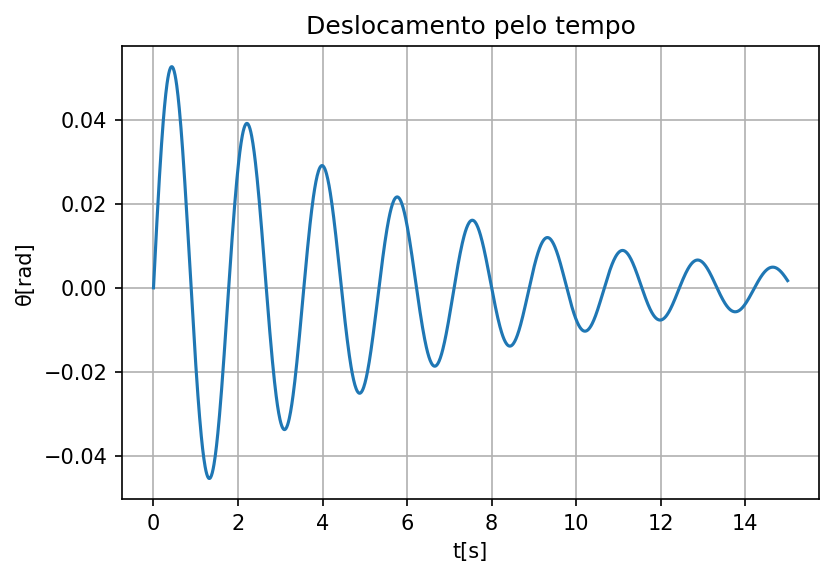

In [28]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(T,X[:,0])
plt.xlabel('t[s]')
xstr = chr(952) + '[rad]'
plt.ylabel(xstr)
plt.title('Deslocamento pelo tempo')
plt.grid(True)

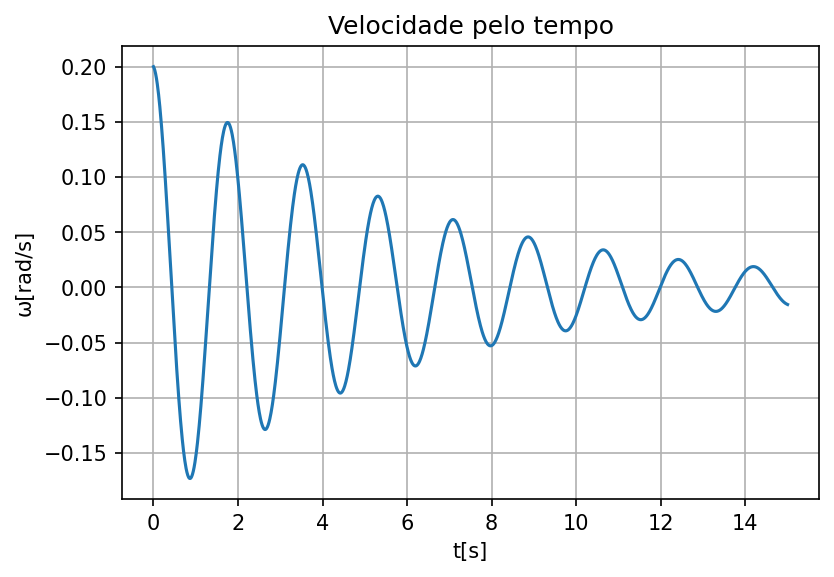

In [29]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(T,X[:,1])
plt.xlabel('t[s]')
vstr = chr(969) + '[rad/s]'
plt.ylabel(vstr)
plt.title('Velocidade pelo tempo')
plt.grid(True)

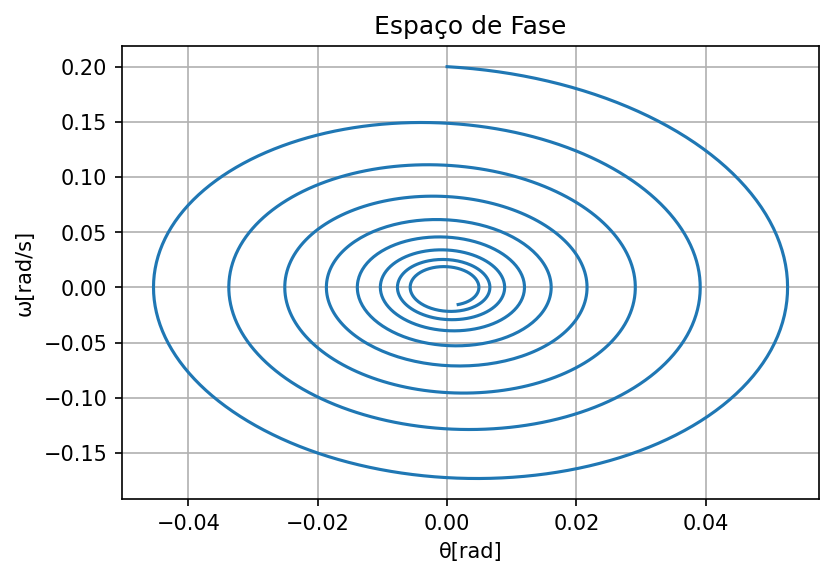

In [30]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(X[:,0],X[:,1])
plt.xlabel(xstr)
plt.ylabel(vstr)
plt.title('Espaço de Fase')
plt.grid(True)